# Relativity Python coursework: Debugging report by ShineHale

Fill in details of bugs you have found in the corresponding sections below. Make sure you fill in the correct section which corresponds to the section of code you found the bug in, otherwise you might not get credit for that bug. 

**Please make sure you read the PDF instructions on Blackboard to see what information you need to include for each bug.**

Make sure you also add the additional information the notebook directs you to add to the debugging report - these bits count for a significant fraction of the marks.

The code you received probably does not have bugs in every section.  LEAVE BLANK any sections for which you did not find any bugs.

You can add extra cells in any of the sections below if you like, as appropriate, including adding additional subheadings. You can use code cells and/or markdown cells and/or copy-and-paste outputs across from your code notebook as appropriate. This notebook is just a report and will not be run, so (unlike for your code notebook which you also need to submit) you do not need to spend time making any code cells you include in this report executable. If it helps, you can include images such as screen snips. Please follow the instructions for the task which you can find in the M&R relativity folder on Blackboard - these include more detailed guidance about this.

**IMPORTANT: DO NOT EDIT THE TITLE OF ANY OF THE SECTIONS BELOW.**  **Penalties will be applied** in cases where the titles below are changed.  This is because your submission will be processed automatically prior to marking and these exact titles are part of the processing script.

### Bugs found in Section 1.1

the equation is right, this formula does not introduce c (speed of light) the essential factor which is related to energy:
the corresponding equation is:

$$E_C = \frac{m_A^2 + m_C^2 - m_B^2}{2m_A}c^2$$

but we put the speed of light into units, so we get the expression in the function, it is correct.

### Bugs found in Section 1.2

the value of $m_e$ is wrong, it should be `me=511e-3`, while the unit convertions of answer are wrong as well, the calculation of the function has $MeV$ unit but the output required in the print statement is $GeV$, so we need to divide the result by a thounsand (or $1e3$).

the correct statements are:

```python
me=511e-3
Enu_e_rf_pi=findEProd_rf(mpi,me,mnu_e)/(1e3) #in GeV - need to remember to convert back to SI later!
Enu_e_rf_K=findEProd_rf(mK,me,mnu_e)/(1e3)
```

### Bugs found in Section 1.3

we need to justify the order of the parameters to calculate the correct answer like:
```python
Emu_rf_pi=findEProd_rf(mpi,mnu,mmu)
Emu_rf_K=findEProd_rf(mK,mnu,mmu)
print('K decay: mu energy ',Emu_rf_K,' MeV')
```

but not as the origin:
```python
Emu_rf_pi=findEProd_rf(mpi,mmu,mnu)
Emu_rf_K=findEProd_rf(mK,mmu,mnu)
print('K decay: mu energy ',Emu_rf_pi,' MeV')
```

### Bugs found in Section 1.4a

No problem.

### Bugs found in Section 1.4b

No problem.

### Bugs found in Section 1.5a

the formula is wrong, we can calculate the momentum of product C as follow:

$$
p_C = \sqrt{E_C^2 - m_C^2c^4} / c^2
$$

but we put the speed of light into the units, so we can simplify it to 

$$
p_C = \sqrt{E_c^2 - m_C^2}
$$

and using the polar frame we can have the 3-momentum as:
$$
{p_C}_x = p_C \, sin{\theta} \, cos{\phi} \\
{p_C}_y = p_C \, sin{\theta} \, sin{\phi} \\
{p_C}_z = p_C \, cos{\theta}
$$

so the correct function as follow:
```python
def find3mtmC_rf(ma,mb,mc,theta,phi): #3-momentum p of particle C 
    p=np.sqrt(findEProd_rf(ma,mb,mc)**2-mc**2)
    return p*np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
```

### Bugs found in Section 1.5b

`p_nu_rf_K` variable is not defined, add the corresponding calculation statement and $\phi$ should be $\frac{\pi}{2}$ in corresponding to decay happens on the plane $x = 0$

 ```python
p_nu_rf_K = find3mtmC_rf(mK, mmu, mnu, theta, phi)
 ```

### Bugs found in Section 1.5c

the direction of the mu is wrong, the negative angle of $\theta$ and $\phi$ are not enough, after having the plot, we should change it to $\pi + \theta$ and $\phi$ stays the same.
so we need to change as follow:
```python
p_mu_rf_pi=find3mtmC_rf(mpi,mnu,mmu,np.pi+theta,phi)
p_mu_rf_K=find3mtmC_rf(mK,mnu,mmu,np.pi+theta,phi)
```

### Bugs found in Section 1.6

Again for the units, we do not need to multiply the c with the momentum and we do not need multiply E with eG to convert the units, the correct is:
```python
def find4mtm(E,p): #Combine energy and 3-momentum to give four-momentum 
    return np.insert(p,0,E)

mtm4nu_rf_pi=find4mtm(Enu_rf_pi,p_nu_rf_pi)
mtm4nu_rf_K=find4mtm(Enu_rf_K,p_nu_rf_K)
```

### Bugs found in Section 1.7

the return is sorry, just put the $E$ and $p$ into the function is enough:
```python
return find4mtm(EC,p_C)
```

### Bugs found in Section 1.8a

Considering the decay formula $A \rightarrow B + C$, then we have 

$$
P_B = P_A - P_C
$$

and then we can calulate $\theta$ and $\phi$ as follow:
$$
\theta = arctan({P_B}_y/{P_B}_x) \\
\phi = \frac{\pi}{2} - arctan({P_B}_z/({P_B}_y^2 + {P_B}_x^2))
$$
so we can justify the codes as:
```python
mtm4B=mtm4A-mtm4C
phiB=np.arctan2(mtm4B[2],mtm4B[1])
pxyB=np.sqrt(mtm4B[1]**2+mtm4B[2]**2)
thetaB=np.pi/2-np.arctan2(mtm4B[3], pxyB)
```


### Bugs found in Section 1.8b

The outcome is correct, since 
$$
\theta_{\mu} + \theta_{\nu_\mu} = 0
$$
and
$$
\phi_{\mu} + \phi_{\nu_\mu} = \pi
$$
Satisfy the condition that the directions of the two vectors P are opposite.

### Bugs found in Section 2.0a

Wrong, since 
$$
E = \gamma m_0c^2
$$
so inverse the outcome, we can have:
$$
\gamma = E / m_0 \\
$$
and 
$$
v = \sqrt{1 -\frac{1}{\gamma^2}}
$$
so we should change it to 
```python
def findbeta(E,m):
    gamma=E/m 
    v=np.sqrt(1-1/(gamma**2)) 
    return -v # equivalent to -v/c in SI units
```

### Bugs found in Section 2.0b

Correct, nothing to change

### Bugs found in Section 2.0c

Wrong, because in the rest frame, the observed value should be the value after time extension, so it should be divided by the its corresponding gamma, so it should be changed to $t_{rf} / \gamma$.the correct statements are as follow:
```python
tau_lf_pi = findgamma(beta_lf_pi)/tau_rf_pi
tau_lf_K = findgamma(beta_lf_K)/tau_rf_K
```

### Bugs found in Section 2.0d

The same as what we said in the section 2.0c, the ratio should be 
$$
\frac{t_{lf}}{t_{rf}} = \sqrt{1 - \beta^2}
$$

and another tiny wrong point is the slice of the data segments, it may not as the same as what we wanna, we can change it to the following statements:
```python
ratio = np.sqrt(1-beta_range**2)
beta_range = np.arange(-1+delta, 1, delta)
```

### Bugs found in Section 2.1

Since the observer is behind the moving source(actually at the original point), so the equation is 
$$
\frac{f_{lf}}{f_{rf}} = \sqrt{\frac{1 - \beta}{1 + \beta}}
$$
so it should be changed to
```python
r = np.sqrt((1-beta_lf_pi)/(1+beta_lf_pi))
```

### Bugs found in Section 2.2a

Correct, the formula is 
$$
E' = \gamma E - \gamma \beta p_z \\
P_z' = -\gamma \beta E + \gamma p_z
$$

### Bugs found in Section 2.2b

the calculation of V is not correct, we should reconsider the progress:
$$
P = \gamma m_0 v = \frac{1}{\sqrt{1 - |v|^2}} m_0 v \\
|P| = \frac{1}{\sqrt{1 - |v|^2}} m_0 |v|  \\
v = \frac{1}{\sqrt{(|P|/m_0)^2 + 1}}P 
$$
so we can change it to 
```python
v_nu_lf_pi = v_nu_lf_pi/(np.sqrt(1 + v_nu_lf_pi[0]**2 + v_nu_lf_pi[1]**2 + v_nu_lf_pi[2]**2)) * c
v_nu_lf_K_z = (v_nu_rf_K_z-beta_lf_K*c)/(1-(beta_lf_K*v_nu_rf_K_z/c))
```
but there are another easy way to solve the calculation, after we have boosted into the lab frame, we can use the $(E, p)$ for calculate the new $\gamma$ for solve the velocity.
```python
v_nu_lf_pi = m4_nu_lf_pi[1:]/(mnu*findgamma(findbeta(m4_nu_lf_pi[0], mnu))) * c # p_lf = gamma_lf·m·v_lf
v_nu_lf_K = m4_nu_lf_K[1:]/(mnu*findgamma(findbeta(m4_nu_lf_K[0], mnu))) * c # p_lf = gamma_lf·m·v_lf
```
that is not enough, the unit is another easy to ignore:
```python
v_nu_rf_pi = m4_nu_rf_pi[1:]/(mnu*findgamma(beta_nu_rf_pi)) * c # p_lf = gamma_lf·m·v_lf 
v_nu_rf_K = m4_nu_rf_K[1:]/(mnu*findgamma(beta_nu_rf_K)) * c # p_lf = gamma_lf·m·v_lf 
```
After calculating, we can find that they have the same outcomes.

### Bugs found in Section 2.2c

Correct, nothing to change, The result is consistent with the conclusion that the static energy is constant.

### Bugs found in Section 2.2d

Just like what we do in 1.8a,change it to 
```python
thetaC_lf_pi=np.pi/2-np.arctan2(m4_nu_lf_pi[3], pxyC_lf_pi)
thetaC_lf_K=np.pi/2-np.arctan2(m4_nu_lf_K[3], pxyC_lf_K)
```
The result is consistent with the expectation because after the speed reference system changes, the angle will also change accordingly, no longer equal or complementary.

### Bugs found in Section 2.3

Maybe the minus should be ignored since the minus sign has been shown in the function `findbeta()`
```python
beta_lf_A=findbeta(EA,mA)
```

### Bugs found in Section 2.4

When the particle flies along the z-axis, if the decayed particle is in the same direction as the +z-axis, then the kinetic energy must be greater, and the energy will be greater. At this time, $\theta$ is 0. On the contrary, if it is reversed, then the kinetic energy will be smaller, then the amount The smaller the energy, then $\theta$ is $\pi$.
Another point is the unit is wrong. Totally, we should change it to: 
```python
m4max_lf=find4mtm_C_lf(mpi,mmu,mnu,0.0,0.0,EA_lf_pi)
print('Max energy in lab frame (pi decay) is ',m4max_lf[0],' MeV') 

m4min_lf=find4mtm_C_lf(mpi,mmu,mnu,np.pi,0.0,EA_lf_pi)
print('Min energy in lab frame (pi decay) is ',m4min_lf[0],' MeV') 
```

### Bugs found in Section 3 Intro

Nothing to change, all of them are correct, it show me the way to simulate the multiple events happening.

### Bugs found in Section 3.0

the normalised factor is wrong, it should be consistent with the theta_new, so it should be changed to 
```python
norm_prob_theta = prob_theta*np.pi #normalizing factor
```

and the range of $x_3$ is not right, the range of x-axis is only $[0-1]$, its unit is $\pi$, so the second parameter is $1$ not `np.pi`
```python
x3=np.linspace(0, 1, 100)
y3=[Nevents/Nbins]*len(x3)
```

### Bugs found in Section 3.1a

All we need to do is calculate the corresponding energy for each angle just like the following changed correct statements(both for pi and K):
```python
energy_nu_rf_pi=findEProd_rf(mpi, mmu, mnu) #particle C in lab frame indpt of angle theta_rf
p_rf_pi_ar = np.array([find3mtmC_rf(mpi, mmu, mnu, theta, 0.0) for theta in theta_rf_pi]).T
energy_nu_lf_pi2 = (gamma_v_pi*energy_nu_rf_pi - beta_v_pi*gamma_v_pi*p_rf_pi_ar[2,:])

energy_nu_rf_K=findEProd_rf(mK,mmu,mnu) #particle C in lab frame indpt of angle theta_rf
p_rf_K_ar = np.array([find3mtmC_rf(mK, mmu, mnu, theta, 0.0) for theta in theta_rf_K]).T
energy_nu_lf_K2 = (gamma_v_K*energy_nu_rf_K - beta_v_K*gamma_v_K*p_rf_K_ar[2,:])
```

### Bugs found in Section 3.1b

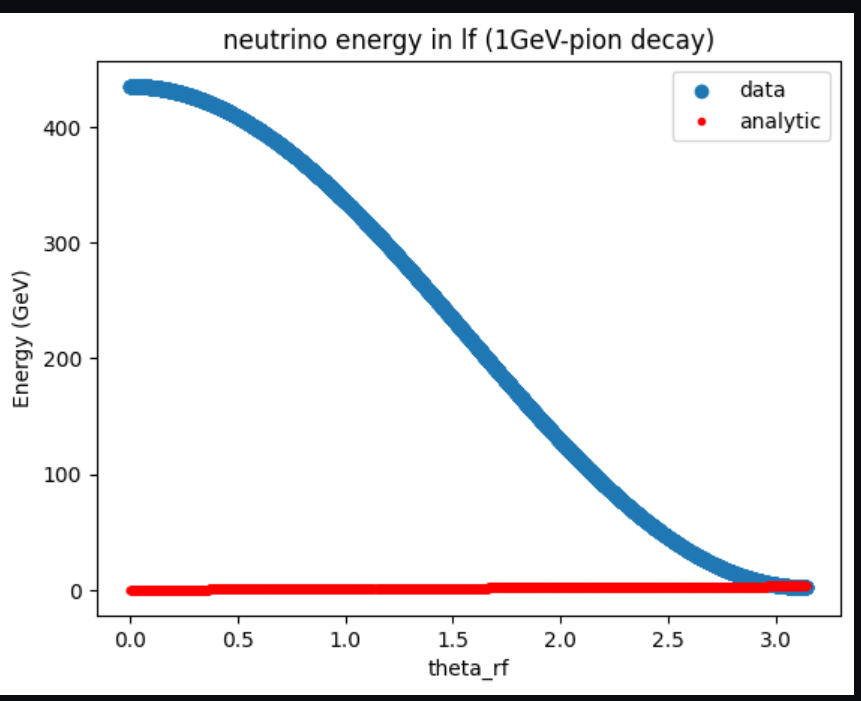

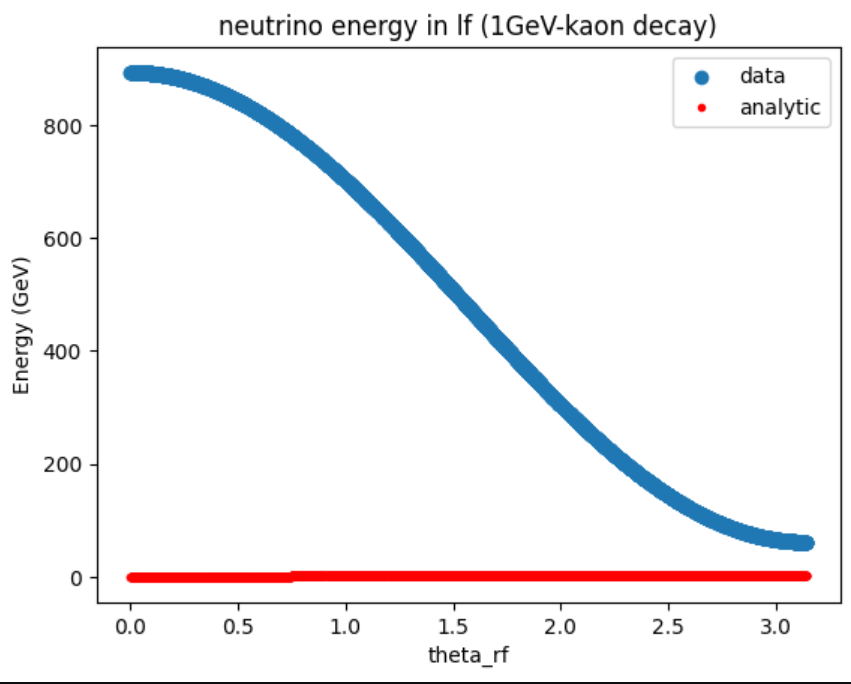

The figures are as above, we can have the analytical form as follow, by just using the $\pi$ decay as an example:
$$
E_{\nu_\mu rf} = \frac{m_\pi^2 + m_{\nu_\mu}^2 - m_\mu^2}{2m_\pi}   \\
P_{z \, rf} = \sqrt{E_{\nu_\mu rf}^2 - m_{\nu_\mu}^2} cos\theta \\
E_{\nu_\mu lf} = \gamma E_{\nu_\mu rf} - \gamma \beta P_{z\, rf} \\
$$
Finally,we will have 
$$
E_{\nu_\mu lf} = \gamma ( E_{\nu_\mu rf} - \beta \sqrt{E_{\nu_\mu rf}^2 - m_{\nu_\mu}^2} cos\theta)
$$
Since the $\beta$ is negative in this figure, so when $\theta$ is $0$, the $E$ will have the max value and when $\theta$ is $\pi$, the $E$ will have the min value.

### Bugs found in Section 3.1c

The reason for presenting such an image is because the $\theta$ angle is uniformly distributed. After a large number of experiments, the probability of occurrence of the $E$ value will present a $cos$ distribution. Another way is that you can regard $\theta$ as a random variable, then $E_{\nu_\mu lf}$ is a function related to the random variable, then the probability will obey the corresponding functional relationship.

### Bugs found in Section 3.1d

Just like what we do in the previous part(1.8a):
```python
m4_lf_pi = np.array([find4mtm(energy_nu_rf_pi, find3mtmC_rf(mpi, mmu, mnu, theta, 0.0)) for theta in theta_rf_pi])
m4_lf_K = np.array([find4mtm(energy_nu_rf_K, find3mtmC_rf(mK, mmu, mnu, theta, 0.0)) for theta in theta_rf_K])
theta_lf_pi=np.array([np.pi/2-np.arctan2(each[3], np.sqrt(each[1]**2+each[2]**2)) for each in m4_lf_pi])
theta_lf_K=np.array([np.pi/2-np.arctan2(each[3], np.sqrt(each[1]**2+each[2]**2)) for each in m4_lf_K])
```

### Bugs found in Section 3.2

Nothing to fix, everything looks perfect.

### Bugs found in Section 3.3a

in the second part of codes, the index is out of range, we should select the 3rd item not $3$ index, the correct statement is as follow:
```python
energy_nu_lf_pi=gamma_v_pi*energy_nu_rf_pi-beta_v_pi*gamma_v_pi*p_rf_pi_ar[2,:]
```

### Bugs found in Section 3.3b

Again, the unit is wrong, we should use $Mev$ not $Gev$ in the xlabel of the plot:
```python
plt.xlabel('Energy (GeV)')
```

the plot is as follow:

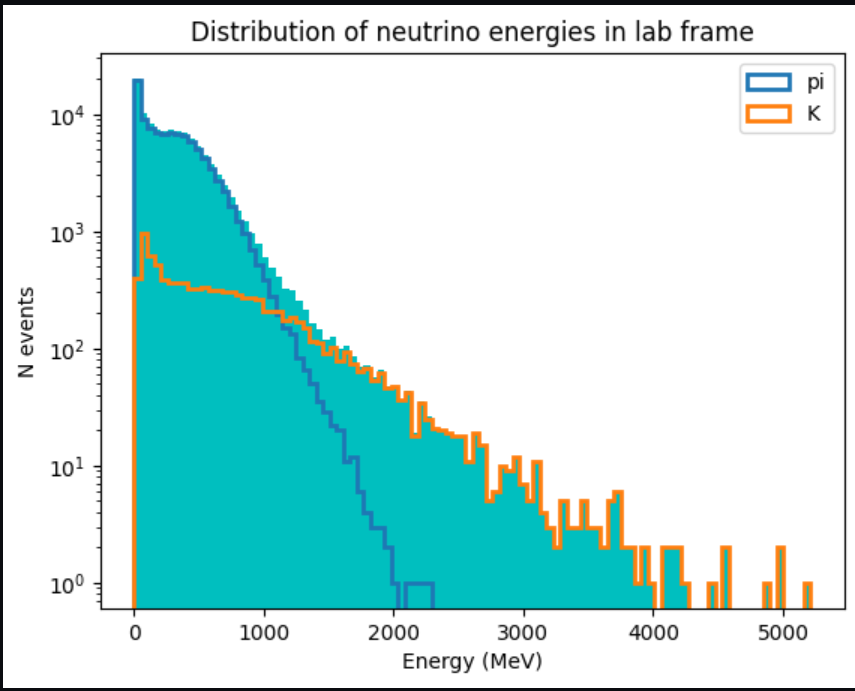

### Bugs found in Section 3.3c

the calculation of $\theta$ is wrong again...
```python
theta_lf_pi=np.pi/2-np.arctan2(b4_lf_pi[3], np.sqrt(b4_lf_pi[1]**2+b4_lf_pi[2]**2))
theta_lf_K=np.pi/2-np.arctan2(b4_lf_K[3], np.sqrt(b4_lf_K[1]**2+b4_lf_K[2]**2))

```

### Bugs found in Section 3.3d

The unit is wrong again...
```python
plt.ylabel('energy (MeV)')
```

### Bugs found in Section 3.3e

- From 3.3(c),The distribution of detected neutrinos as a function of the angle $\theta_{lf}$ suggests that $\pi$ decay is more likely to occur when $\theta_{lf}$ is around 0, while the contribution from K decay is less pronounced. This indicates that the probability of detecting a neutrino from $\pi$ decay is higher for small values of $\theta_{lf}$
- From 3.3(d), for a specific value of $\theta_{lf}$, K decay produces neutrinos with greater energy compared to $\pi$ decay. This means that if a detected neutrino has a higher energy, it is more likely to originate from K decay rather than $\pi$ decay.

Based on these observations, we can detect by following things:
1. If a detected neutrino has a low energy and corresponds to a small value of $\theta_{lf}$, it is likely to originate from $\pi$ decay. This is supported by the information from 3.3(c) where $\pi$ decay is more prominent in this region.

2. If a detected neutrino has a high energy and corresponds to a specific value of $\theta_{lf}$, it is more likely to originate from K decay. This is supported by the information from 3.3(d) where K decay produces neutrinos with higher energies for specific angles.
